# Diagnostics

* The estimation and inference from the regression model depends on several assumptions. We can divide the potential problems into three categories:

1. **Error** is assumed to be $\epsilon \sim N(0, \sigma^2I)$ (i.e., independent, equal variance and normally distributed)
2. **Model** structure is assumed to be linear $Ey = X\beta$
3. **Unusual observations** few observations might change the choice and fit of the model.

Diagnostics can be:
* **Graphical**: flexible but harder to definitively interpret
* **Numerical**: narrower in scope, but require no intuition

### Checking Error Assumptions

* Independence, constant variance, and normality or the error, $\epsilon$
* The errors are not observable, but we can exame the residuals, $\hat \epsilon$
*  Residual and error are not interchangeable, the same, or have the same properties


<p>&nbsp;</p>
\begin{split}
\hat \epsilon = y - \hat y = (I - H)y = (I - H)X\beta + (I -H)\epsilon = (I - H)\epsilon
\end{split}
<p>&nbsp;</p>

Therefore:

<p>&nbsp;</p>
\begin{split}
var \: \hat \epsilon = var(I - H)\epsilon = (I - H)\sigma^2
\end{split}
<p>&nbsp;</p>

#### Constant Variance

* It's not possible to check the assuption of constant variance just by examining the residuals alone. We need to check whether the variance in the residuals is related to some other quantity.

1. Plot $\hat \epsilon$ against $\hat y$. We should see constant variance in the vertical direction. The scatter plot should be symmetric verically about zero
    - check for signs of heteroscedasticity, nonlinearity
2. Plot $\hat \epsilon$ against $x_1$ (for predictors in and out of the model)

In [1]:
library(faraway)
data(savings)

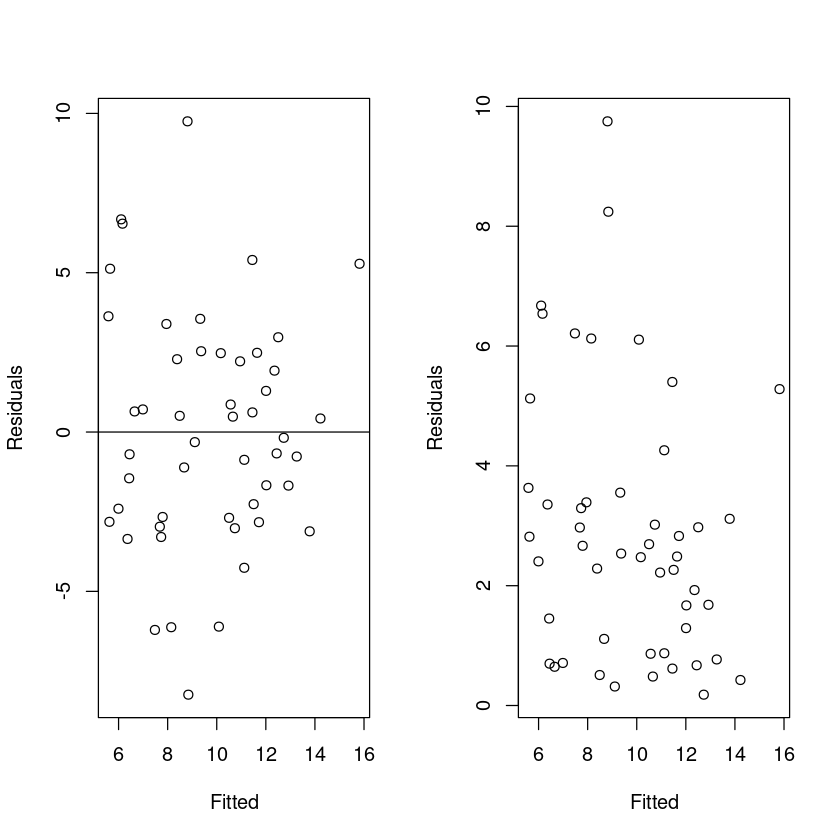

In [3]:
g = lm(sr ~ pop15 + pop75 + dpi + ddpi, data = savings)
par(mfrow= c(1,2))
plot(fitted(g), residuals(g), xlab="Fitted", ylab="Residuals")
abline(h=0)


plot(fitted(g), abs(residuals(g)), xlab="Fitted", ylab="Residuals")

* The second plot is to chec nonconstant variance only
* The first plot check for non-linearity
* A quick way to check for nonconstant variance is with regression

In [8]:
summary(lm(abs(residuals(g)) ~ fitted(g)))


Call:
lm(formula = abs(residuals(g)) ~ fitted(g))

Residuals:
    Min      1Q  Median      3Q     Max 
-2.8395 -1.6078 -0.3493  0.6625  6.7036 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   4.8398     1.1865   4.079  0.00017 ***
fitted(g)    -0.2035     0.1185  -1.717  0.09250 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.163 on 48 degrees of freedom
Multiple R-squared:  0.05784,	Adjusted R-squared:  0.03821 
F-statistic: 2.947 on 1 and 48 DF,  p-value: 0.0925


#### First let's train our eyes to spot biases with simulated data
1. Constant variance
2. Strong nonconstant variance 
3. Mild nonconstant variance
4. Nonlinearity

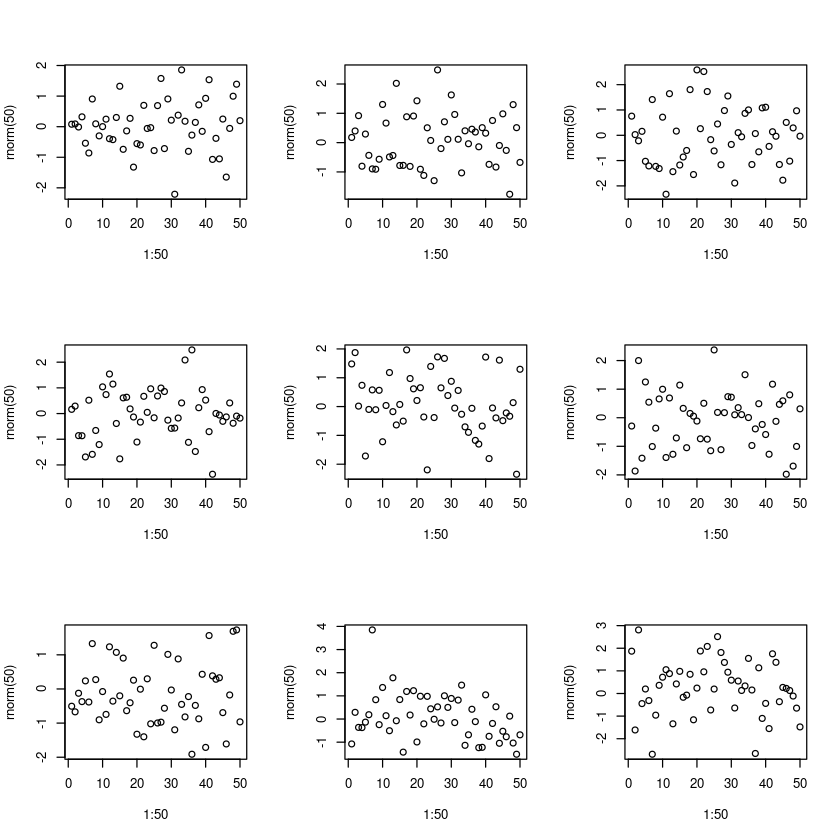

In [13]:
# Constant variance
par(mfrow = c(3,3))
for(i in 1:9) plot (1:50, rnorm(50))

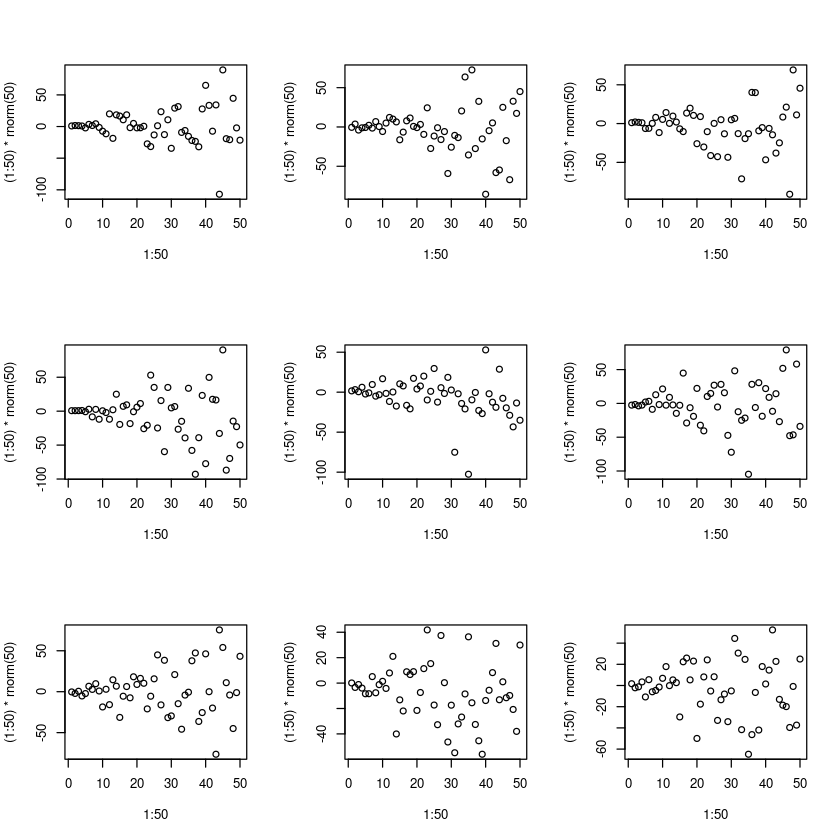

In [15]:
# strong biases
par(mfrow=c(3,3))
for(i in 1:9) plot(1:50, (1:50)*rnorm(50))

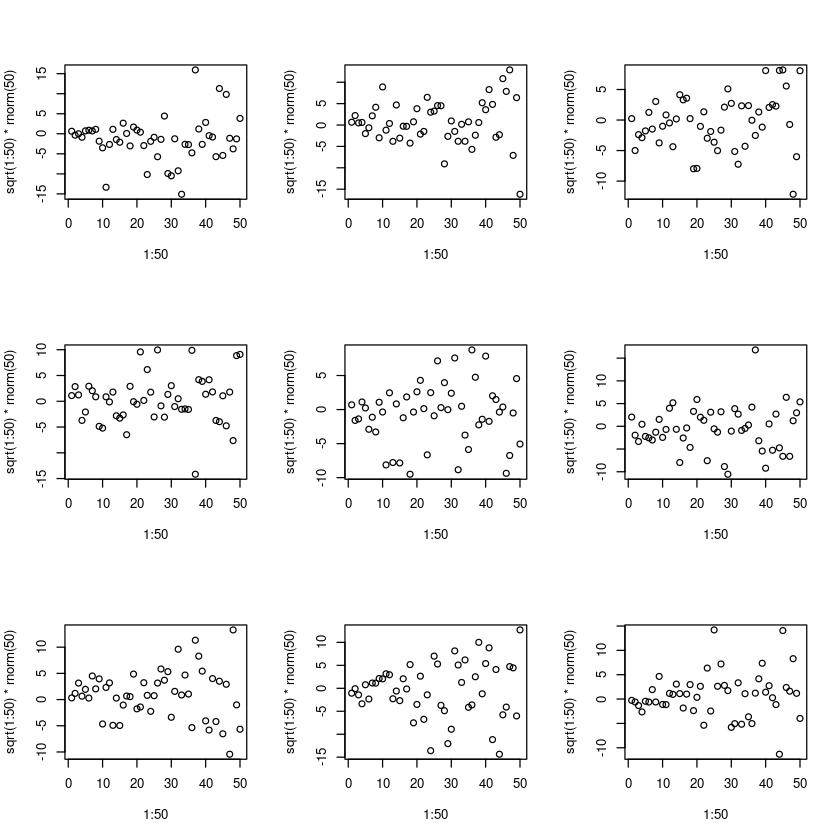

In [16]:
# Mild nonconstant variance
par(mfrow= c(3,3))
for(i in 1:9) plot(1:50, sqrt(1:50)*rnorm(50))

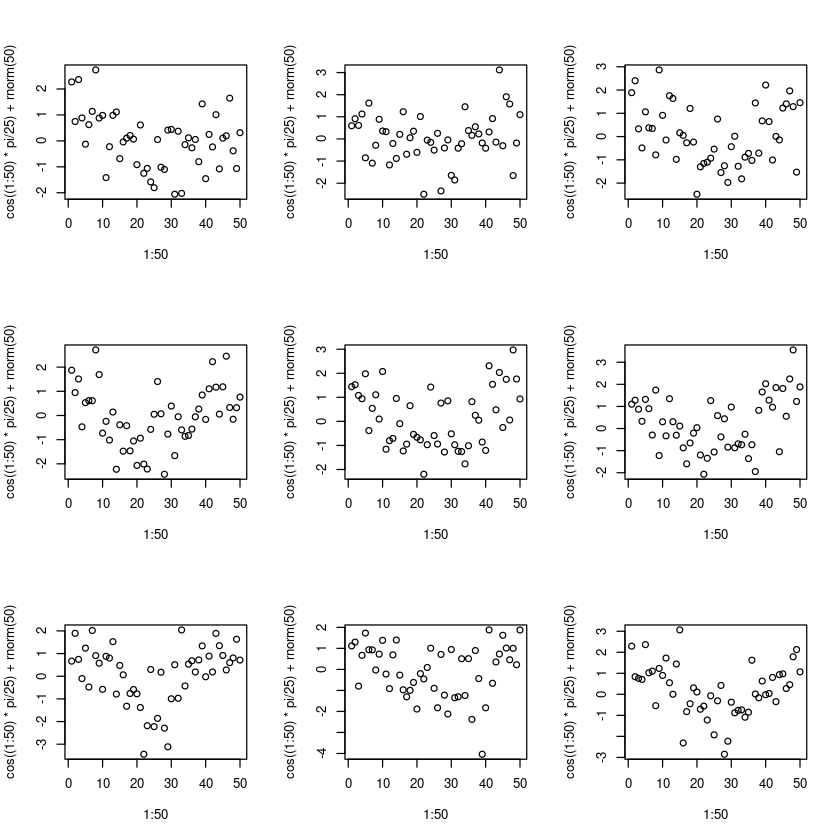

In [17]:
# nonlinearity
par(mfrow= c(3,3))
for(i in 1:9) plot(1:50, cos((1:50)*pi/25) + rnorm(50))

* Calibrate the eyes with varies generation of simulation
* Now let's check residuals againts predictors

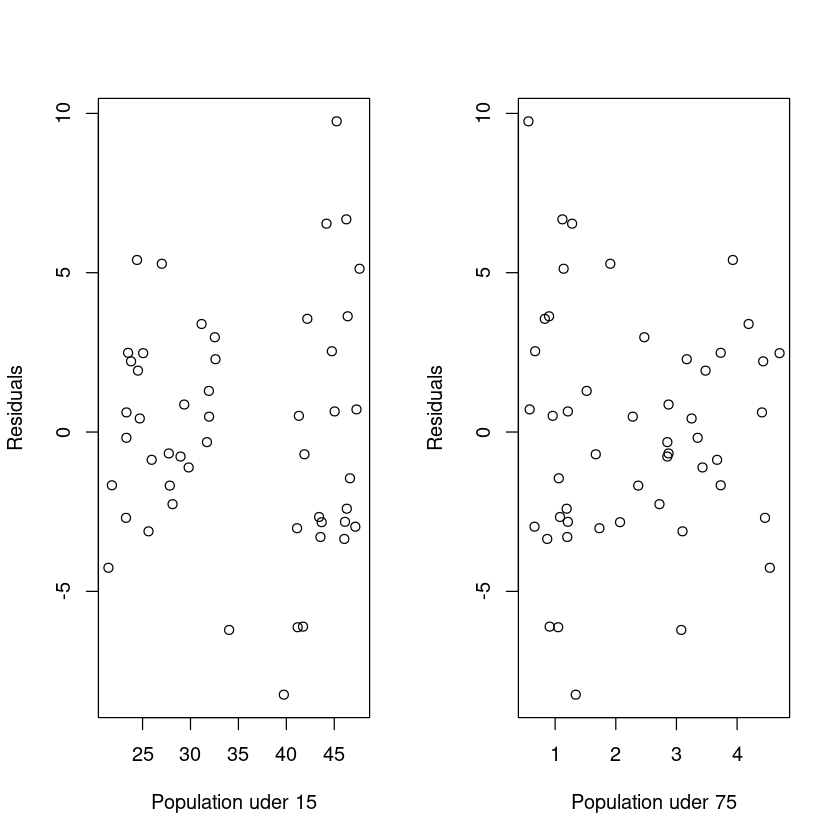

In [4]:
par(mfrow = c(1,2))
plot(savings$pop15, residuals(g), xlab = 'Population uder 15', ylab = 'Residuals')
plot(savings$pop75, residuals(g), xlab = 'Population uder 75', ylab = 'Residuals')

In [5]:
var.test(residuals(g)[savings$pop15 > 35], residuals(g)[savings$pop15 < 35])


	F test to compare two variances

data:  residuals(g)[savings$pop15 > 35] and residuals(g)[savings$pop15 < 35]
F = 2.7851, num df = 22, denom df = 26, p-value = 0.01358
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 1.240967 6.430238
sample estimates:
ratio of variances 
          2.785067 


* A significant difference is seen
* There are two basic approaches to deal with unconstant variance:
    1. Weighted Least Squares
    2. Transform the variable

Consider transforming the response $y$ to $h(y)$ where $h()$ is chosen in a way that $var \: h(y)$ is constant

* If $var \: y = var \: \epsilon \alpha(Ey)^2 $ then $h(y) = log(y)$ transformation is suggested
* If $var \: y = var \: \epsilon \alpha(Ey) $ then $h(y) = \sqrt{y}$ transformation is suggested
* The right transformation must be decided upon visual inspection of data pattern. Test can be also implementented such as the regression o $\epsilon$ againt $\hat y$ or $x_i$
* Some transformations might be difficult when $y\leq0$ for some i, square root or log transformations will fail. A work around would be $log(y+\delta)$ transformation adding a small $\delta$, but that can makes interpretation difficult.

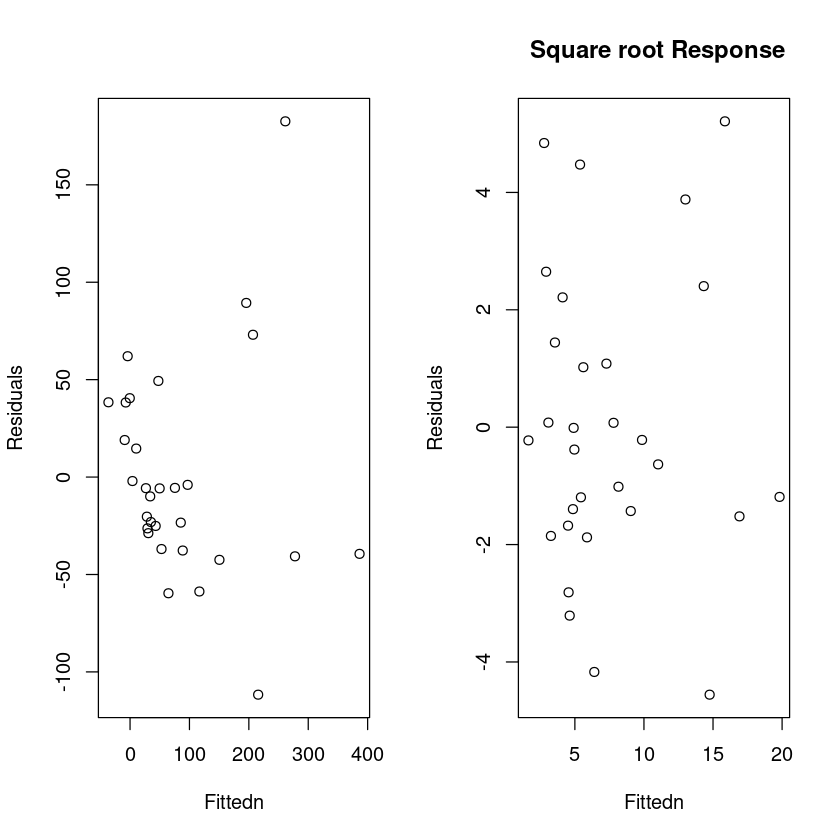

In [9]:
data(gala)
par(mfrow = c(1,2))
# non-transformed
gg = lm(Species ~ Area + Elevation + Scruz + Nearest + Adjacent, data = gala)
plot(fitted(gg), residuals(gg), xlab = "Fittedn", ylab = "Residuals")

# transformed
gs = lm(sqrt(Species) ~ Area + Elevation + Scruz + Nearest + Adjacent, data = gala)
plot(fitted(gs), residuals(gs), xlab = "Fittedn", ylab = "Residuals", main = " Square root Response")


* Square root transformation is almost always appropriated for count response data. The Poisson distribution is a good model for counts and that distribution has the property that the mean is equal to the variance thus suggesting the square root transformation. 

#### Normality

Tests and CIs are based on the assuption of normal errors. The residuals can be assessed for normality using Q-Q plot


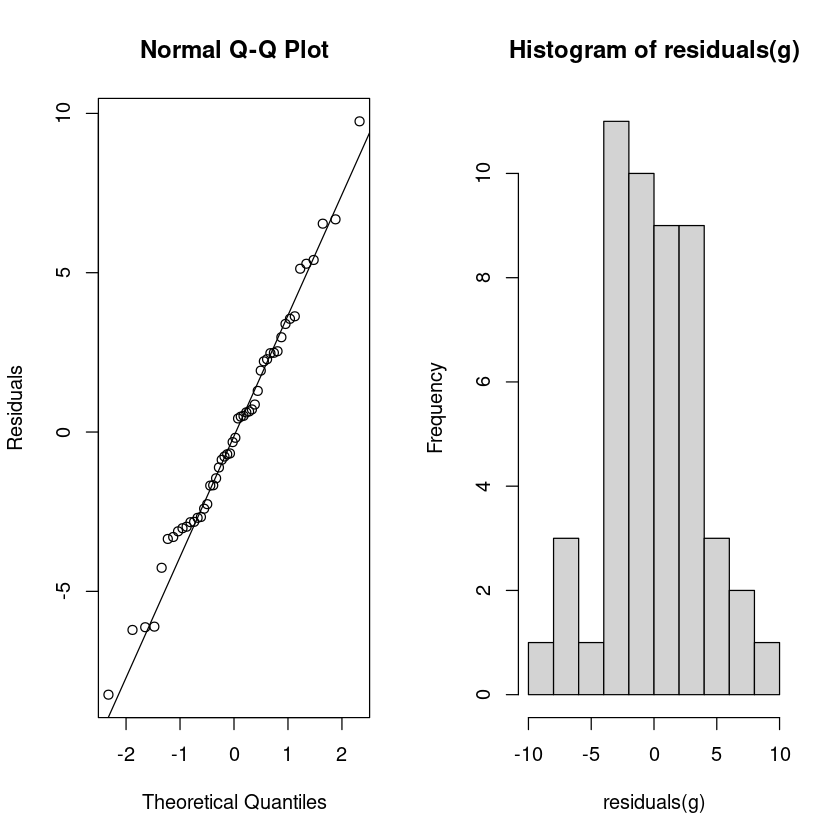

In [11]:
par(mfrow = c(1,2))
qqnorm(residuals(g), ylab = "Residuals")
qqline(residuals(g))
hist(residuals(g))

*  Let's callibrate your expectations on how a normal distribution looks like using simulated data
1. Normal
2. Lognormal
3. Cauchy (long-tailed distribution)
4. Uniform (short-tailed distribution)

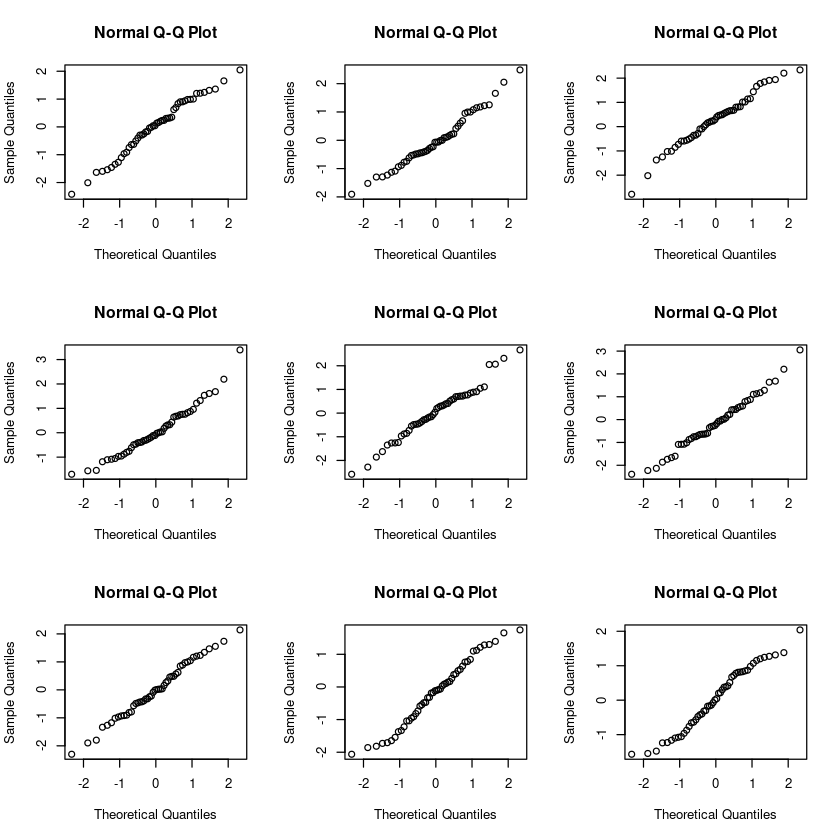

In [12]:
# Normal
par(mfrow = c(3,3))
for(i in 1:9) qqnorm(rnorm(50))

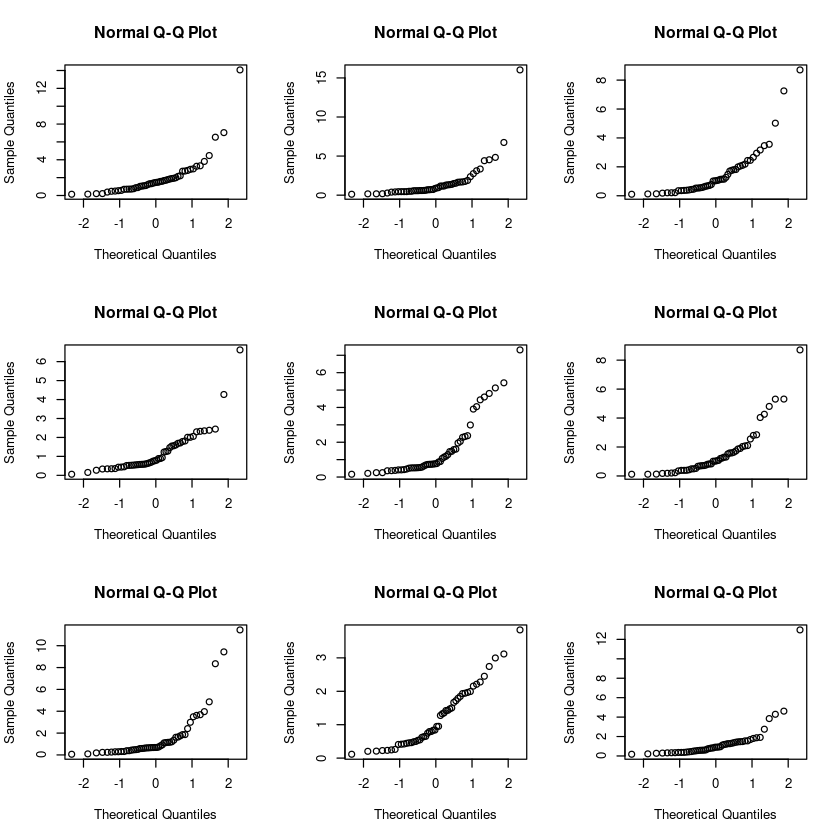

In [14]:
# Log-normal
par(mfrow = c(3,3))
for(i in 1:9) qqnorm(exp(rnorm(50)))

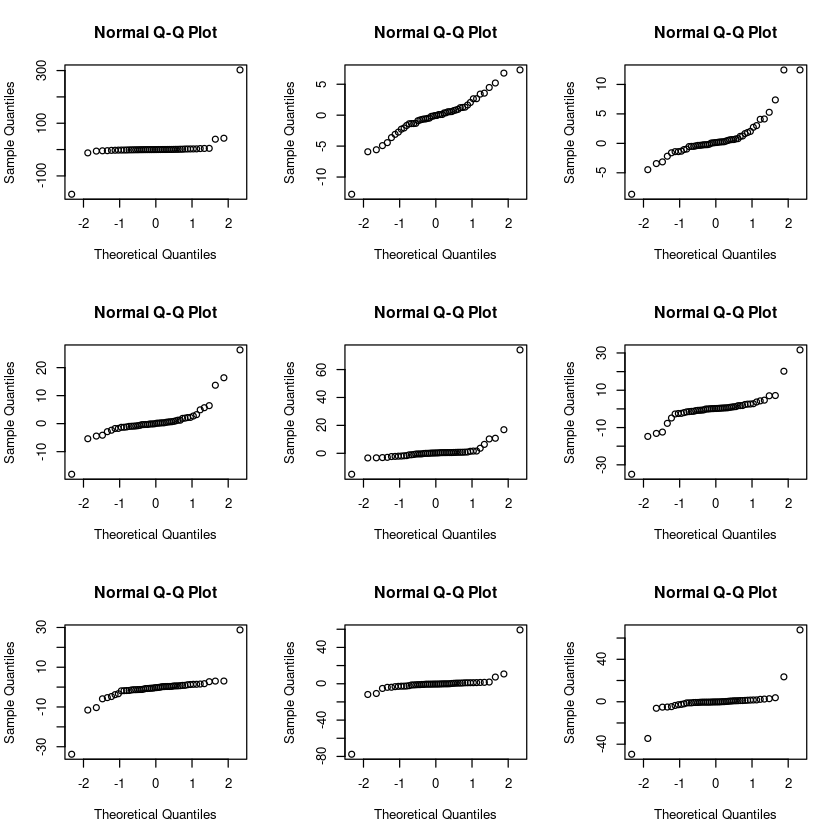

In [15]:
# Cauchy
par(mfrow = c(3,3))
for(i in 1:9)qqnorm(rcauchy(50))

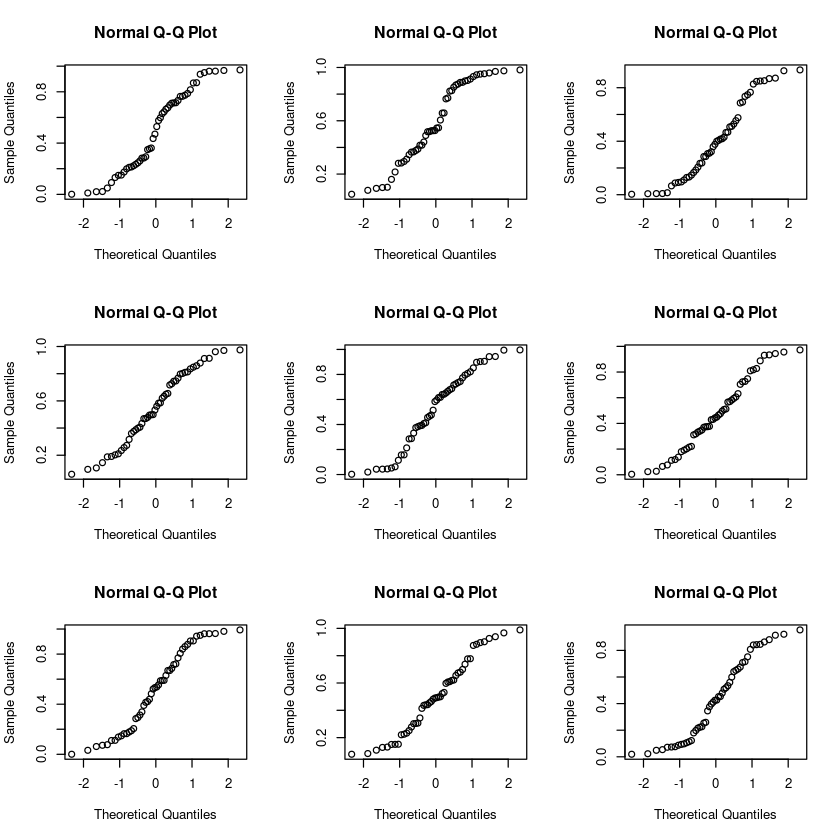

In [16]:
# Uniform
par(mfrow = c(3,3))
for(i in 1:9)qqnorm(runif(50))

* When errors are not normal, least squares estimates may not be optimal and tests and CIs might not be exact.
* Only long-tailed distributions cause large inaccuracies
* Mild nonnormality can be safely ignored and the larger the sample size, less problematic the nonnormality is

#### Solutions
* **Short-tailed distribution**: no serious consequences. Distorsions can be ignored
* **Skewed errors**: transformation of the response may solve the problem
* **Long-tailed errors**: accept the nonnormality and base the inference on permutation tests or bootstrap that does not make assuption about distribution. Alternativelly, approach observation differently giving different weights to outliers

The formal test for normality is the Shapiro-Wilk test

In [17]:
shapiro.test(residuals(g))


	Shapiro-Wilk normality test

data:  residuals(g)
W = 0.98698, p-value = 0.8524


#### Correlated Errors

We assume that the errors are uncorrelated, but for temporally or spatially related data this may well be untrue.

* We can graphically check $\hat \epsilon_i$ against $\hat \epsilon_{i-1}$ or use Durbin-Watson test:  
<p>&nbsp;</p>
\begin{split}
DW = \frac{\sum_{i=2}^n (\hat \epsilon_i -  \hat \epsilon_{i-1})^2}{\sum_{i=1}^n \hat \epsilon_i^2}
\end{split}
<p>&nbsp;</p>


In [18]:
data(airquality)
head(airquality)

,Ozone,Solar.R,Wind,Temp,Month,Day
,<int>,<int>,<dbl>,<int>,<int>,<int>
1,41,190,7.4,67,5,1
2,36,118,8.0,72,5,2
3,12,149,12.6,74,5,3
4,18,313,11.5,62,5,4
5,NA,NA,14.3,56,5,5
6,28,NA,14.9,66,5,6


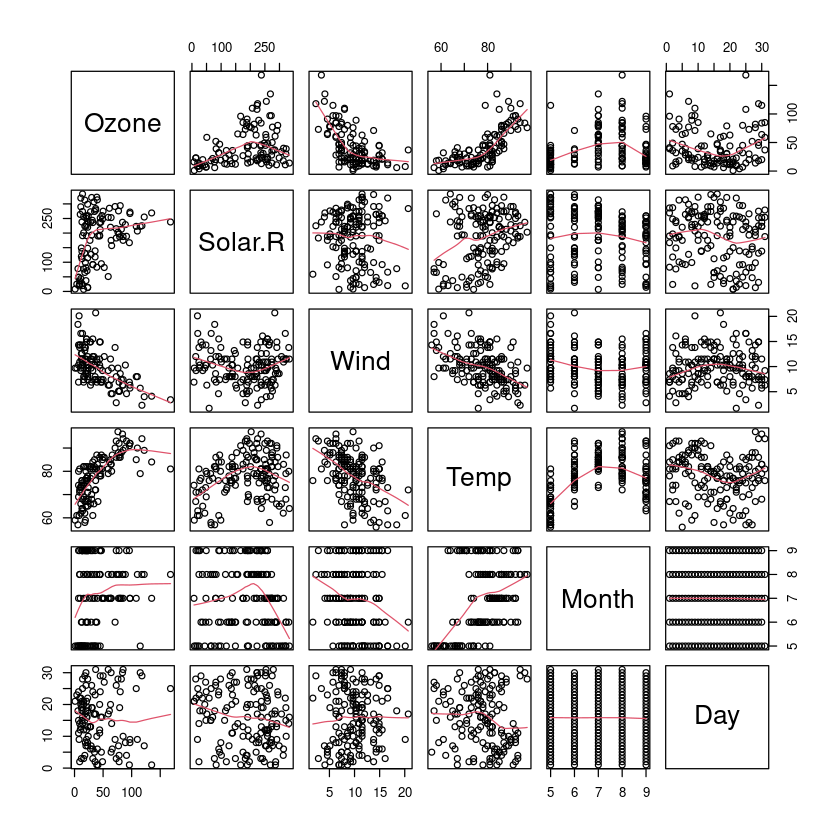

In [19]:
pairs(airquality, panel = panel.smooth)


Call:
lm(formula = Ozone ~ Solar.R + Wind + Temp, data = airquality, 
    na.action = na.exclude)

Residuals:
    Min      1Q  Median      3Q     Max 
-40.485 -14.219  -3.551  10.097  95.619 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -64.34208   23.05472  -2.791  0.00623 ** 
Solar.R       0.05982    0.02319   2.580  0.01124 *  
Wind         -3.33359    0.65441  -5.094 1.52e-06 ***
Temp          1.65209    0.25353   6.516 2.42e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 21.18 on 107 degrees of freedom
  (42 observations deleted due to missingness)
Multiple R-squared:  0.6059,	Adjusted R-squared:  0.5948 
F-statistic: 54.83 on 3 and 107 DF,  p-value: < 2.2e-16


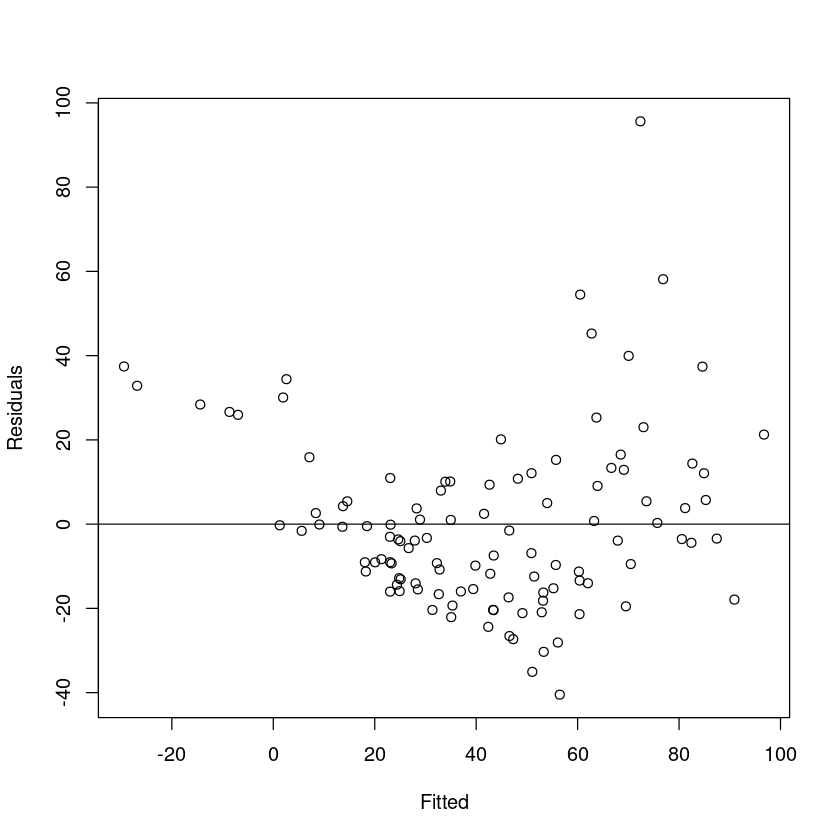

In [27]:
g = lm(Ozone ~ Solar.R + Wind + Temp, data = airquality, na.action = na.exclude)
summary(g)
plot(fitted(g), residuals(g), xlab = 'Fitted', ylab = 'Residuals')
abline(h=0)

* We see signs of some nonconstant variance and nonlinearity 

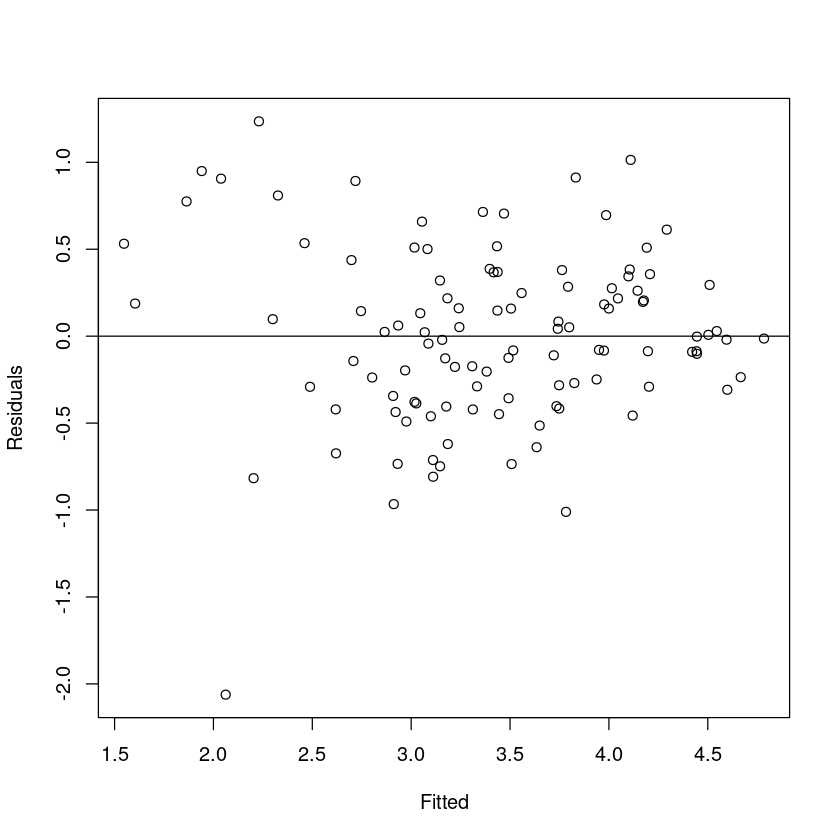

In [26]:
gl = lm(log(Ozone) ~ Solar.R + Wind + Temp, data = airquality, na.action = na.exclude)
plot(fitted(gl), residuals(gl), xlab = "Fitted", ylab = "Residuals")
abline(h=0)

* A strong error correlation would be evident by a longer run of residuals above or below the lone for positive correlation or greater than normal fluctuation for negative correlations
* It is often useful to plot successive residuals

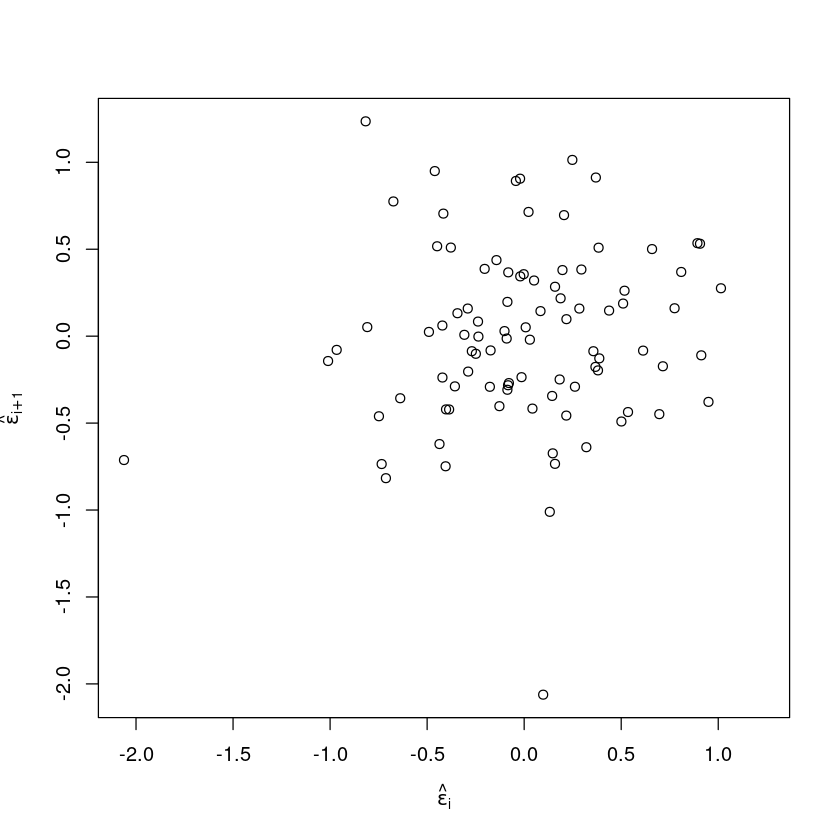

In [38]:
x_lab = expression(hat(epsilon)[i])
y_lab = expression (hat(epsilon) [i + 1])
                   
plot(residuals(gl)[-153], residuals(gl)[-1],
       xlab = x_lab,
       ylab = y_lab)

In [44]:
#the intercept is ommited because resuduals have mean zero
summary(lm(residuals(gl)[-1] ~ -1 +  residuals(gl)[-153]))


Call:
lm(formula = residuals(gl)[-1] ~ -1 + residuals(gl)[-153])

Residuals:
     Min       1Q   Median       3Q      Max 
-2.07274 -0.28953  0.02583  0.32256  1.32594 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)
residuals(gl)[-153]   0.1104     0.1053   1.048    0.297

Residual standard error: 0.5078 on 91 degrees of freedom
  (60 observations deleted due to missingness)
Multiple R-squared:  0.01193,	Adjusted R-squared:  0.001073 
F-statistic: 1.099 on 1 and 91 DF,  p-value: 0.2973


* If correlated errors are confirmed, we can use generalized least squares

### Finding Unusual Observations

* Some observation do not fit the model well, these are called outliers. They change the fit of the model and are also called influencial observations. 

* A leverage is an unusual point in the predictor space that has the potential to incluence the fit

#### Leverage

$h_i = H_{ii}$  are called leverages and are useful for diagnostics. A large values of $H_i$ will make a large leverage, wich a small $H_i$ will make a small leverage

<p>&nbsp;</p>
\begin{split}
var \: \hat \epsilon_i = \sigma^2(1 - h_i)
\end{split}
<p>&nbsp;</p>

* Given that, $\sum_i h_i = p$, an average $h_i$ is $p/n$
* Leverages more than $2p/n$ (twice the mean leverage) should be inspected carefully
* Large leverage values are due to extreme values in $X$
* Leverage values taking into account only the values of $X$ being only a partial estimator 

In [51]:
g = lm(sr ~ pop15 + pop75 + dpi + ddpi, data = savings)
ginf = influence(g)
round(ginf$hat, 4)

Australia        Austria        Belgium        Bolivia         Brazil 
        0.0677         0.1204         0.0875         0.0895         0.0696 
        Canada          Chile          China       Colombia     Costa Rica 
        0.1584         0.0373         0.0780         0.0573         0.0755 
       Denmark        Ecuador        Finland         France        Germany 
        0.0627         0.0637         0.0920         0.1362         0.0874 
        Greece      Guatamala       Honduras        Iceland          India 
        0.0966         0.0605         0.0601         0.0705         0.0715 
       Ireland          Italy          Japan          Korea     Luxembourg 
        0.2122         0.0665         0.2233         0.0608         0.0863 
         Malta         Norway    Netherlands    New Zealand      Nicaragua 
        0.0794         0.0479         0.0906         0.0542         0.0504 
        Panama       Paraguay           Peru    Philippines       Portugal 
        0.0390         0.0694         0.0650         0.0643         0.0971 
  South Africa South Rhodesia          Spain         Sweden    Switzerland 
        0.0651         0.1608         0.0773         0.1240         0.0736 
        Turkey        Tunisia United Kingdom  United States      Venezuela 
        0.0396         0.0746         0.1165         0.3337         0.0863 
        Zambia        Jamaica        Uruguay          Libya       Malaysia 
        0.0643         0.1408         0.0979         0.5315         0.0652

In [52]:
sum(ginf$hat)

[1] 5

* The sum of the leverages is indeed five, the number of parameters in the model
* We will now use the half-normal plot to determine large values of the leverage. Half-normal plots can be used for $\hat \epsilon$, but they are more often used for leverages

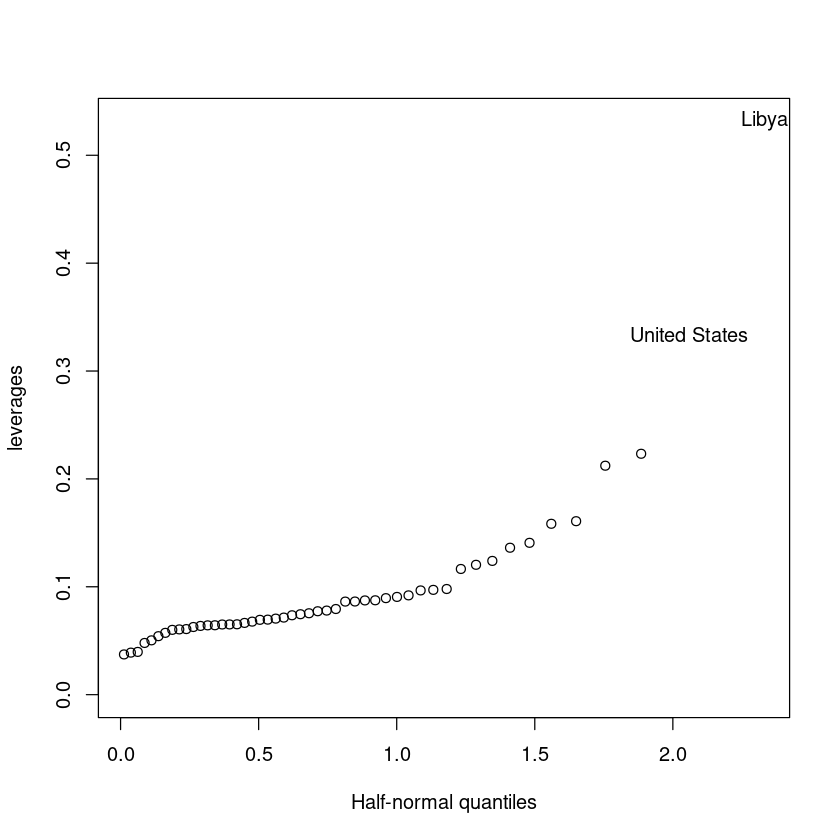

In [56]:
countries = row.names(savings)
halfnorm(influence(g)$hat, labs = countries, ylab= "leverages")

* Because we have $var \: \hat \epsilon_i = \sigma^2(1 - h_i)$, then 

<p>&nbsp;</p>
\begin{split}
r_i = \frac{\hat \epsilon_i}{\sigma \sqrt{1 - h_i}} 
\end{split}
<p>&nbsp;</p>

which are called *studentized residuals* where $var \:r_i=1$ and $corr(r_i,r_j)$ is small.

[1] 3.8027

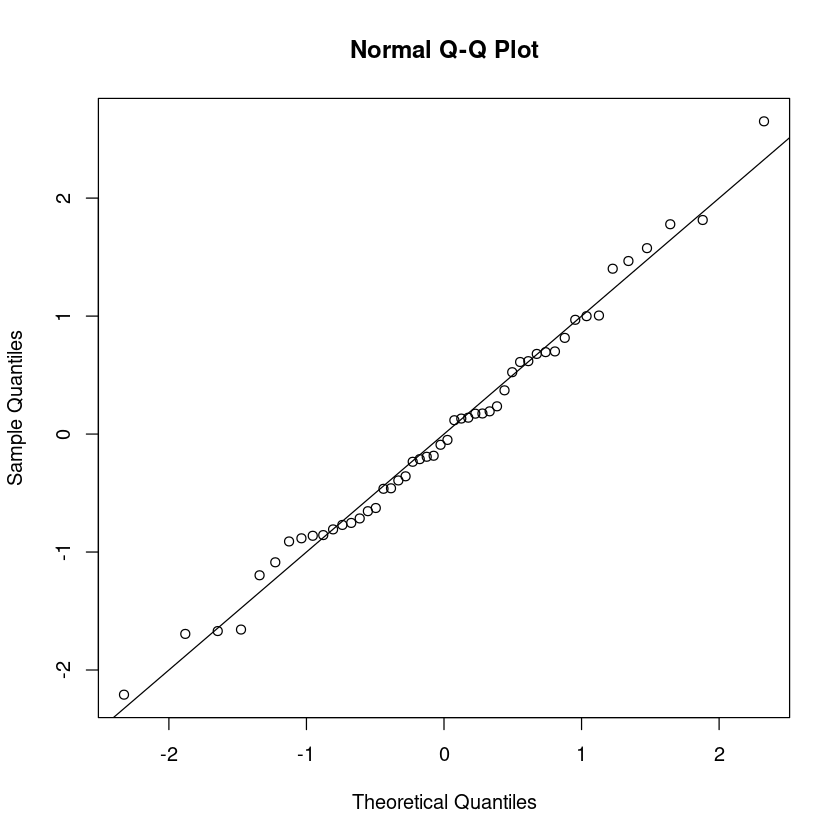

In [62]:
gs = summary(g)
round(gs$sig, 4)
stud = residuals(g)/(gs$sig*sqrt(1-ginf$hat))
qqnorm(stud)
abline(0,1)

#### Outliers

* Outlier is a point that does not fit the current model.
* Outliers can concel themselves
* To detect them, we exclude point $i$ and recompute estimates to get $\hat \beta_{(i)}$ and $\hat \sigma_{(i)}^2$

<p>&nbsp;</p>
\begin{split}
\hat y_{(i)} = x_i^T \hat \beta_{(i)} 
\end{split}
<p>&nbsp;</p>

If $\hat y_i - y_i$ is large, then case $i$ is an outlier. But to compare those deviations, we need to standartize data first

<p>&nbsp;</p>
\begin{split}
v\hat ar (y_i -  \hat y_{(i)}) = \hat \sigma_{(i)}^2(1 + x_i^T(X_{(i)}^TX_{(i)}))^{-1}x_i
\end{split}
<p>&nbsp;</p>

Now we can calculate $t_i$ 

<p>&nbsp;</p>
\begin{split}
t_i = \frac{y_i -  (\hat y_{(i)}}{\hat \sigma_{(i)}^2(1 + x_i^T(X_{(i)}^TX_{(i)}))^{-1}x_i)^{1/2}
}
\end{split}
<p>&nbsp;</p>

* That way we can test every suspicious values
* a level of $\alpha/n$ should be esed in each of the tests. The method is called *Bonferroni correction*; the problem is, the larger the $n$ the more conservative the test is

In [64]:
jack  = rstudent(g)
round(jack[which.max(abs(jack))], 3) 

Zambia 
 2.854

In [66]:
# almost 3 deviation from the standardized mean!! But is it an outlier?
round(qt(0.05/(50*2), 44), 3)

[1] -3.526

* 2.85 is less than 3.52, so Zambia is not an outlier

#### Important information about outliers

* Two or more next to each other can hide each other
* An outlier in one model, might not be outlier in other model when variables are changed or transformed
* The error distribution may not be normal
* Individual outliers are usually less of a problem in larger datasets

#### What can be done?

1. Check for a data-entry error
2. Examine the physical context (outliear may represent interesting rare phenomenon)
3. Exclude from the analyis, but try to reintroduce it back if the model is changed
4. Use robust regression methods

#### Example of data with multiple outliers


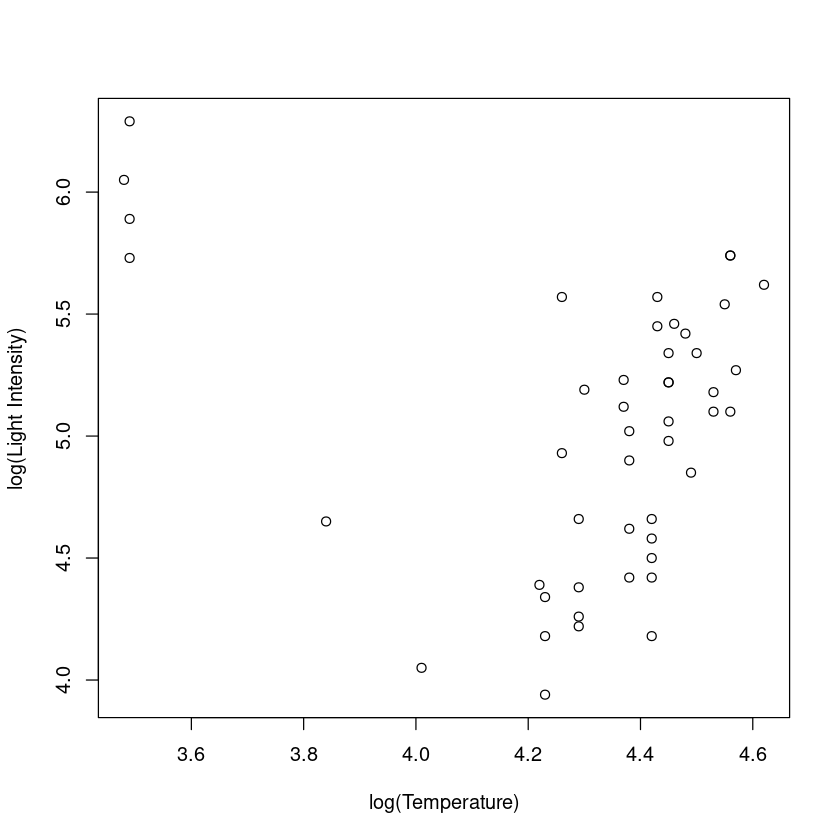

In [67]:
data(star)
plot(star$temp, star$light, xlab  = "log(Temperature)", ylab = "log(Light Intensity)")

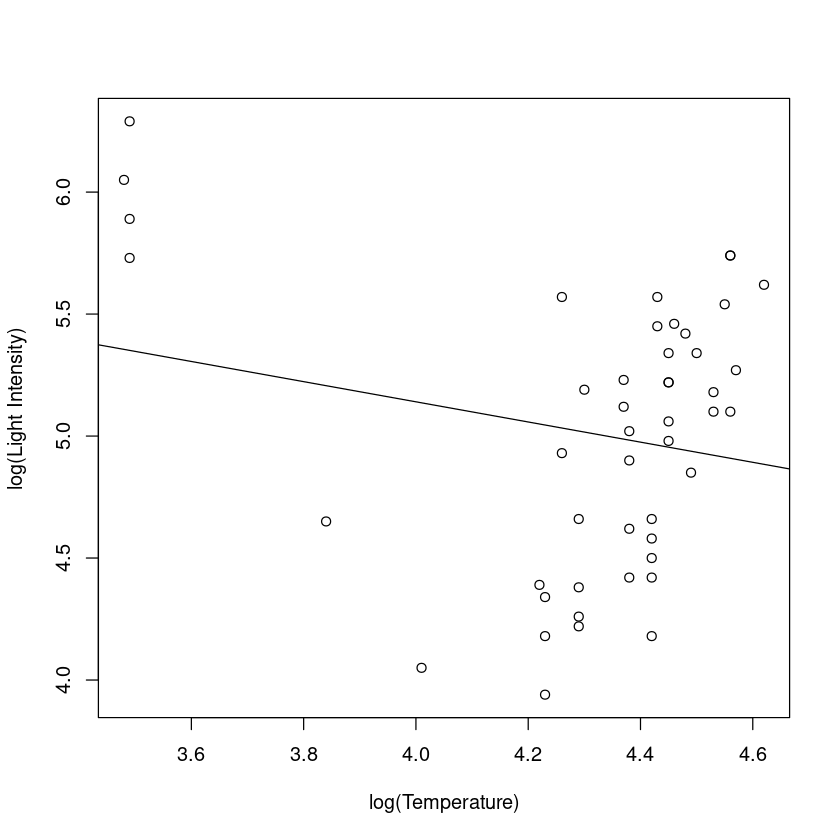

In [69]:
ga = lm(light ~temp, data = star)
plot(star$temp, star$light, xlab  = "log(Temperature)", ylab = "log(Light Intensity)")
abline(ga)

In [71]:
# Check if the outlier test detect those 4 points. Looking for values above 3.5
round(range(rstudent(ga)), 3)

[1] -2.049  1.906

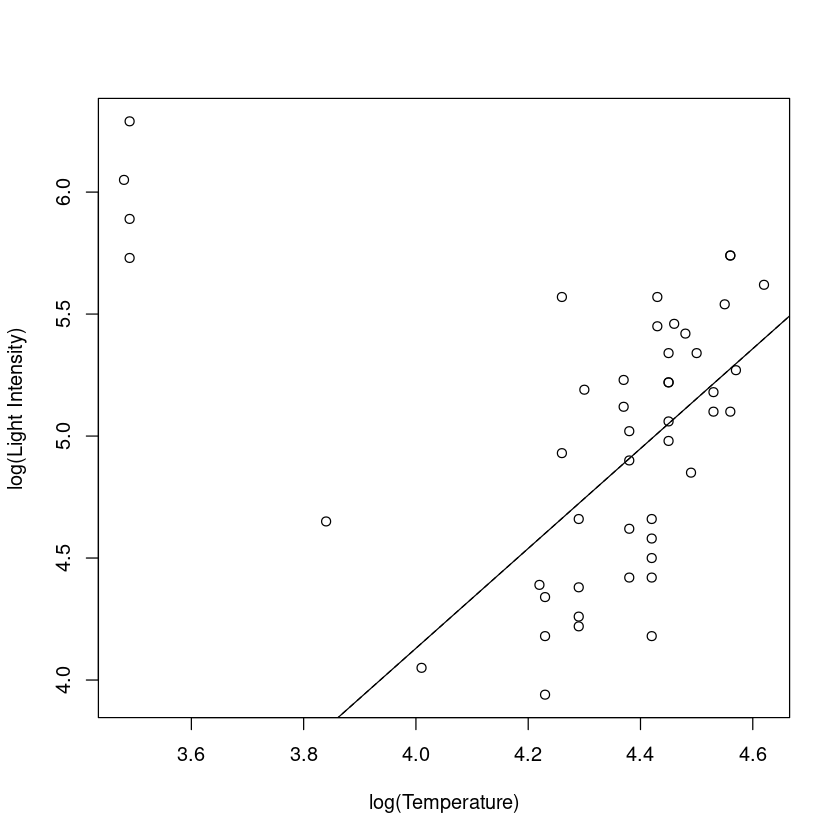

In [72]:
# regression without the outlier
ga = lm(light ~ temp, data = star, subset = (temp > 3.6))
plot(star$temp, star$light, xlab  = "log(Temperature)", ylab = "log(Light Intensity)")
abline(ga, lty = 2)

#### Influential Observations

* An influential point may or may not be an outlier, but whose removel from the dataset would cause a large change in the fit. 
* There are several measures of influence. We can consider $X^T(\hat \beta - \hat \beta_{(i)}) = \hat y - \hat y_i$, but we would have to calculate for every observation. 
* We can use Cock's statistics to measure influence, which is composed by two terms: the residual effect $r_i^2$ and the leverage $h_i$. 
* Half-normal plot of $D_i$ can be used to identify influential observations

<p>&nbsp;</p>
\begin{split}
D_i = \frac{(\hat y - \hat y_{(i)})^T((\hat y - \hat y_{(i)})}{p\hat \sigma^2} =  \frac{1}{p}r_i^2 \frac{h_i}{1-h_i}
\end{split}
<p>&nbsp;</p>


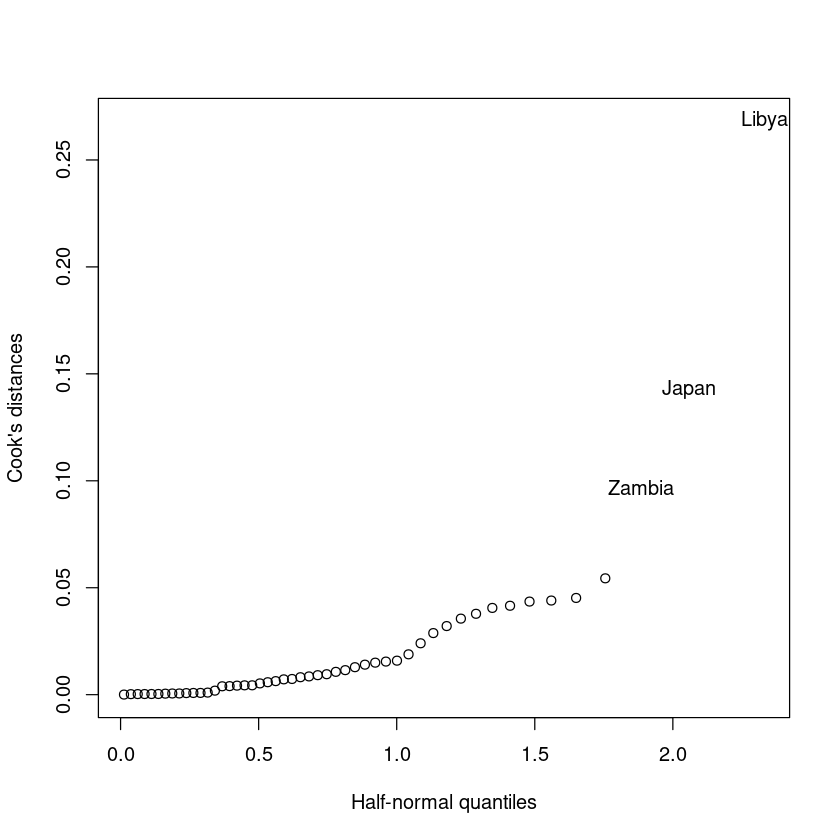

In [74]:
cook = cooks.distance(g)
halfnorm(cook, 3, labs = countries, ylab = "Cook's distances")

In [76]:
gl = lm(sr ~ pop15 + pop75 + dpi + ddpi, data = savings, subset = (cook < max(cook)))
summary(gl)


Call:
lm(formula = sr ~ pop15 + pop75 + dpi + ddpi, data = savings, 
    subset = (cook < max(cook)))

Residuals:
    Min      1Q  Median      3Q     Max 
-8.0699 -2.5408 -0.1584  2.0934  9.3732 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept) 24.5240460  8.2240263   2.982  0.00465 **
pop15       -0.3914401  0.1579095  -2.479  0.01708 * 
pop75       -1.2808669  1.1451821  -1.118  0.26943   
dpi         -0.0003189  0.0009293  -0.343  0.73312   
ddpi         0.6102790  0.2687784   2.271  0.02812 * 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.795 on 44 degrees of freedom
Multiple R-squared:  0.3554,	Adjusted R-squared:  0.2968 
F-statistic: 6.065 on 4 and 44 DF,  p-value: 0.0005617


In [77]:
# compare it to the full model
summary(g)


Call:
lm(formula = sr ~ pop15 + pop75 + dpi + ddpi, data = savings)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.2422 -2.6857 -0.2488  2.4280  9.7509 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 28.5660865  7.3545161   3.884 0.000334 ***
pop15       -0.4611931  0.1446422  -3.189 0.002603 ** 
pop75       -1.6914977  1.0835989  -1.561 0.125530    
dpi         -0.0003369  0.0009311  -0.362 0.719173    
ddpi         0.4096949  0.1961971   2.088 0.042471 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.803 on 45 degrees of freedom
Multiple R-squared:  0.3385,	Adjusted R-squared:  0.2797 
F-statistic: 5.756 on 4 and 45 DF,  p-value: 0.0007904


integer(0)

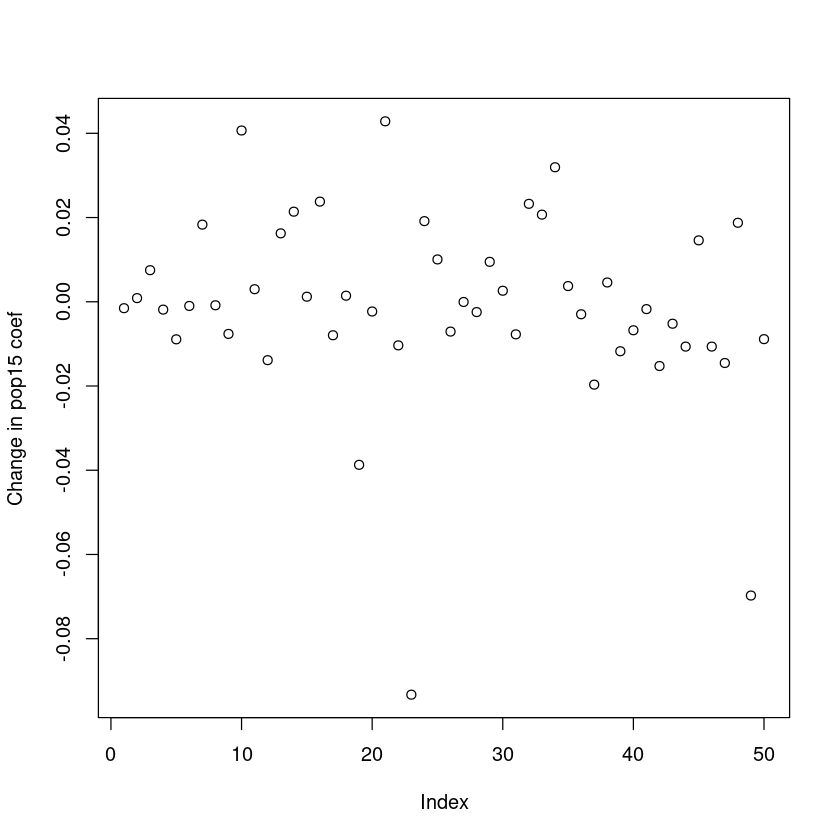

In [78]:
# leaveout-one differences in the coefficients for beta_pop15
plot(ginf$coef[,2], ylab = "Change in pop15 coef")
#identify(1:50, ginf$coef[,2], countries)

In [80]:
gj = lm(sr ~ pop15 + pop75 + dpi + ddpi, data = savings, subset = (countries != "Japan"))
summary(gj)


Call:
lm(formula = sr ~ pop15 + pop75 + dpi + ddpi, data = savings, 
    subset = (countries != "Japan"))

Residuals:
   Min     1Q Median     3Q    Max 
-7.997 -2.592 -0.115  2.032 10.157 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept) 23.9401714  7.7839968   3.076  0.00361 **
pop15       -0.3679015  0.1536296  -2.395  0.02096 * 
pop75       -0.9736743  1.1554502  -0.843  0.40397   
dpi         -0.0004706  0.0009191  -0.512  0.61116   
ddpi         0.3347486  0.1984457   1.687  0.09871 . 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.738 on 44 degrees of freedom
Multiple R-squared:  0.277,	Adjusted R-squared:  0.2113 
F-statistic: 4.214 on 4 and 44 DF,  p-value: 0.005649


#### Checking the Structure of the Model

How do we check if the systematic part ($Ey = X\beta$) of the model is correct?

* Lack of fit tests may give you hints, but wouldn't tell you how to fix.
* Partial regression or added variable plots can help isolate the effect of $x_i$ on y. 
* One strategy is:
    1. Remove one X variable and perform the regression using all others
    2. use the removed X as reponse variable again all other X variables
    3. plot the residuals from both equations againts each other

#### Partial Regression plot

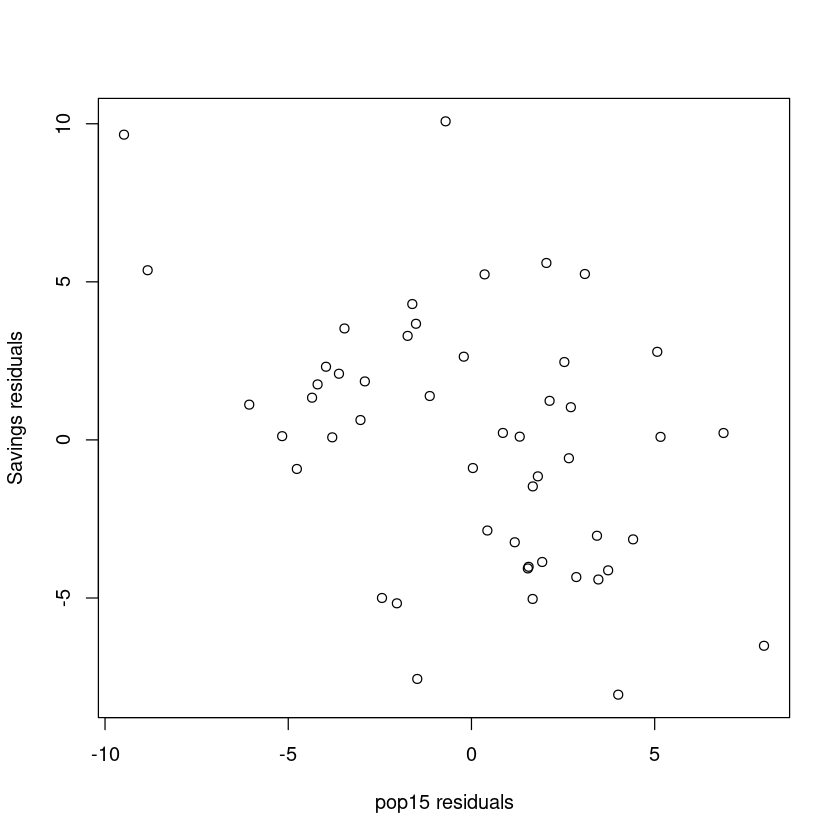

In [83]:
# Partial regression (added variable) for pop1
d = residuals(lm(sr ~ pop75 + dpi + ddpi, data = savings))
m = residuals(lm(pop15 ~ pop75 + dpi + ddpi, data = savings))
plot(m, d, xlab = "pop15 residuals", ylab = "Savings residuals")

In [87]:
# regression with the residuals
coef(lm(d ~ m))

(Intercept)             m 
 1.532406e-16 -4.611931e-01

In [89]:
round(coef(g), 4)

(Intercept)       pop15       pop75         dpi        ddpi 
    28.5661     -0.4612     -1.6915     -0.0003      0.4097

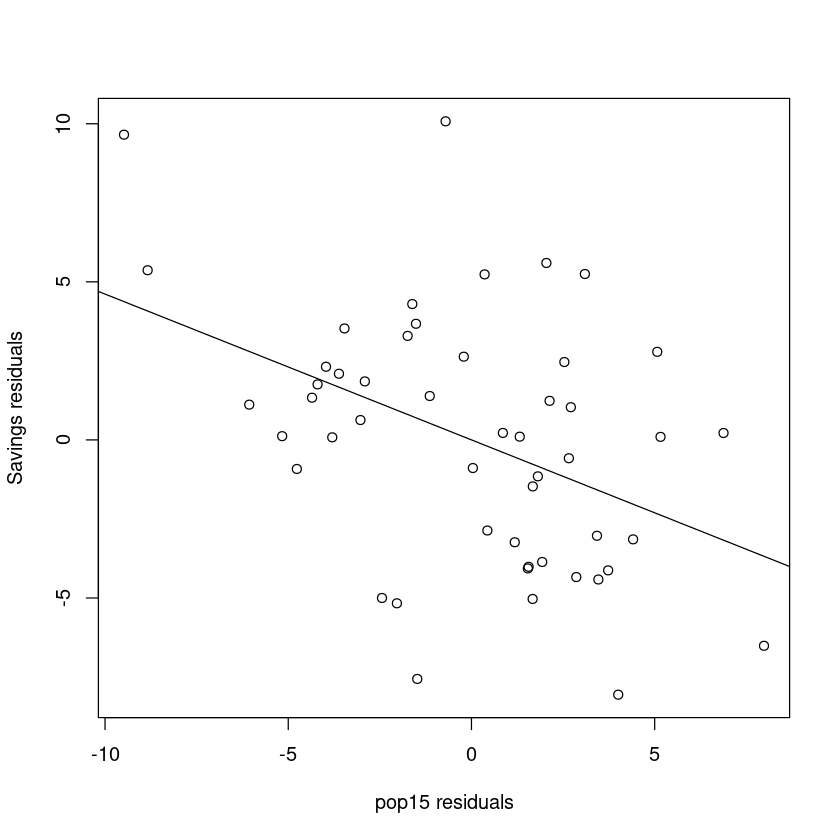

In [90]:
plot(m, d, xlab = "pop15 residuals", ylab = "Savings residuals")
abline(0, coef(g)['pop15'])

In [99]:
# Residual coeficient
a = lm(d ~ m)
coef(a)[2]

# full regression coefficients
coef(g)[2]

#they are the same!

m 
-0.4611931

pop15 
-0.4611931

#### Partial Residual plot

* Better for nonlinearity detection while added variable plots are better for outlier/influential detection

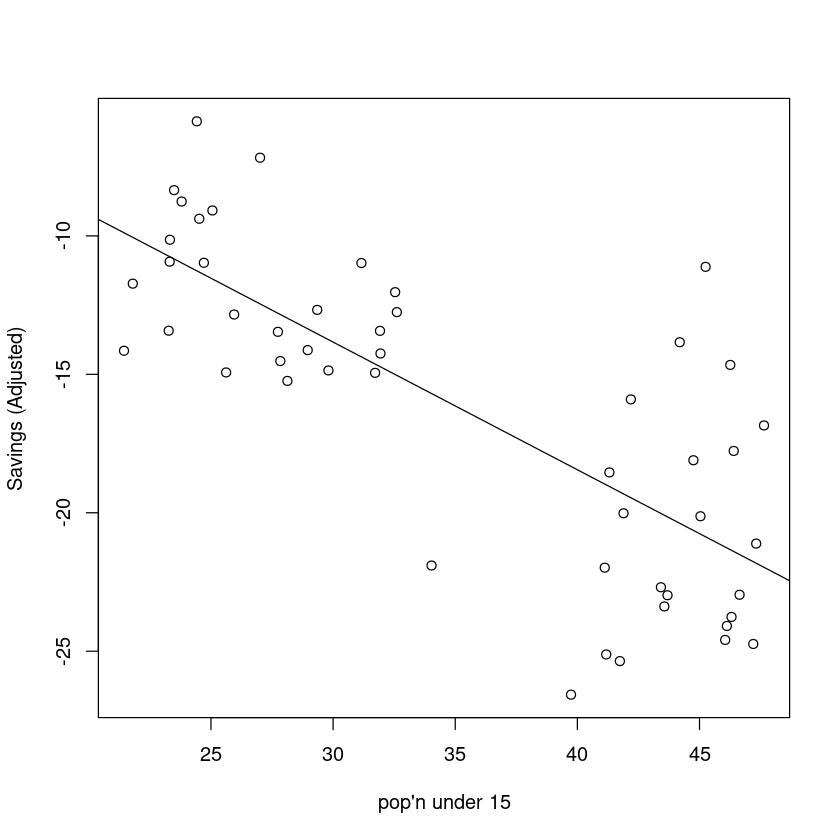

In [101]:
plot(savings$pop15, residuals(g) + coef(g)['pop15']*savings$pop15, xlab = "pop'n under 15", ylab  = "Savings (Adjusted)")
abline(0, coef(g)['pop15'])

* We have spotted structure in the data (two groups)

In [105]:
g1 = lm(sr ~ pop15 + pop75 + dpi + ddpi, savings,  subset = (pop15 > 35))
g2 = lm(sr ~ pop15 + pop75 + dpi + ddpi, savings,  subset = (pop15 < 35))

summary(g1)
summary(g2)


Call:
lm(formula = sr ~ pop15 + pop75 + dpi + ddpi, data = savings, 
    subset = (pop15 > 35))

Residuals:
    Min      1Q  Median      3Q     Max 
-5.5511 -3.5101  0.0443  2.6764  8.4983 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)
(Intercept) -2.4339689 21.1550278  -0.115    0.910
pop15        0.2738537  0.4391910   0.624    0.541
pop75       -3.5484769  3.0332806  -1.170    0.257
dpi          0.0004208  0.0050001   0.084    0.934
ddpi         0.3954742  0.2901012   1.363    0.190

Residual standard error: 4.454 on 18 degrees of freedom
Multiple R-squared:  0.1558,	Adjusted R-squared:  -0.03185 
F-statistic: 0.8302 on 4 and 18 DF,  p-value: 0.5233



Call:
lm(formula = sr ~ pop15 + pop75 + dpi + ddpi, data = savings, 
    subset = (pop15 < 35))

Residuals:
    Min      1Q  Median      3Q     Max 
-5.5890 -1.5015  0.1165  1.8857  5.1466 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept) 23.9617950  8.0837502   2.964  0.00716 **
pop15       -0.3858976  0.1953686  -1.975  0.06092 . 
pop75       -1.3277421  0.9260627  -1.434  0.16570   
dpi         -0.0004588  0.0007237  -0.634  0.53264   
ddpi         0.8843944  0.2953405   2.994  0.00668 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.772 on 22 degrees of freedom
Multiple R-squared:  0.5073,	Adjusted R-squared:  0.4177 
F-statistic: 5.663 on 4 and 22 DF,  p-value: 0.002734
